In [1]:
import os
import argparse
import sys
import time
from math import ceil

import cv2
import numpy as np
import torch

from blink_utils.models.face_detectors import *



In [2]:
#The function for get inference time each image
def latency_time(model_face_detector):
    timeFace = 0
    inference_times = np.array([])

    ContainerPath = './DataSet_imgs'
    listdir = os.listdir(ContainerPath)
    for SubContainer_path in listdir:
        #path for images enach subject
        SubContainer_path = os.path.join(ContainerPath, SubContainer_path)
        listdir_2 = os.listdir( SubContainer_path)
        for file_path in listdir_2: 
            startFaceDetector = time.time()
            #parsing the path of img
            img_path = os.path.join(SubContainer_path, file_path)
            image_ori = cv2.imread(img_path)
            #cv2.imshow(img_path,image_ori)
            facePoints = model_face_detector(image_ori)
            if facePoints == None:
                inference_times = np.append(inference_times,[[np.nan()]])
            else: inference_times = np.append(inference_times,[[time.time() - startFaceDetector]])
        

        
        
    return inference_times

In [3]:
#array of inference times 
HoGDlib = latency_time(HoGDlib('./modelFiles'))
CNNOpenCV = latency_time(CNNOpenCV('./modelFiles'))
UltraLightONNX=latency_time(UltraLightONNX("./modelFiles", "version-slim-320_320_simplified.onnx", threshold = 0.8, inputSize=320))
UltraLightMNN = latency_time(UltraLightMNN("./modelFiles", "version-slim-320_320.mnn", threshold = 0.8, inputSize=320))


ValueError: operands could not be broadcast together with shapes (1,0,2) (1,4420,2) 

In [4]:
print(f'OpenCV: {CNNOpenCV.max(),CNNOpenCV.min()} HoG: {HoGDlib.max(),HoGDlib.min()} ONNX: {UltraLightONNX.max(),UltraLightONNX.min()} MNN:{UltraLightMNN.max(),UltraLightMNN.min()}')

OpenCV: (0.17056727409362793, 0.03391003608703613) HoG: (0.06187796592712402, 0.04986453056335449) Ultra: (0.25551295280456543, 0.016993284225463867) MNN<class 'blink_utils.models.face_detectors.UltraLight.UltraLightMNN'>


In [5]:
yerr = [HoGDlib.std(),CNNOpenCV.std(),UltraLightONNX.std(),UltraLightMNN.std()]
bars= [HoGDlib.mean(),CNNOpenCV.mean(),UltraLightONNX.mean(),UltraLightMNN.mean()]
ind=[0,1,2,3]

In [6]:
print(bars,yerr)

[0.051265077590942384, 0.038196122646331786, 0.021301567554473877] [0.0013736816754930177, 0.013490700878267948, 0.023587223275355767]


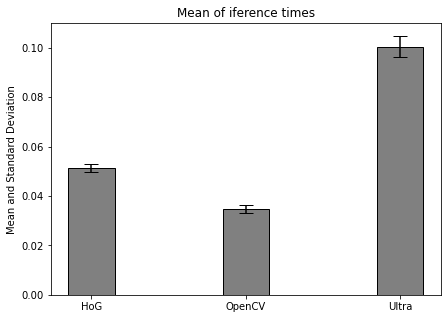

In [19]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(sharex=True, sharey=True,figsize=(7, 5))
axs.bar(ind, bars, width = 0.3, color = 'gray', edgecolor = 'black', yerr=yerr, capsize=7)

plt.title('Mean of iference times')
plt.xticks(ind,['HoG', 'OpenCV', 'ONNX', 'MNN'])
plt.ylabel('Mean and Standard Deviation')


plt.show()

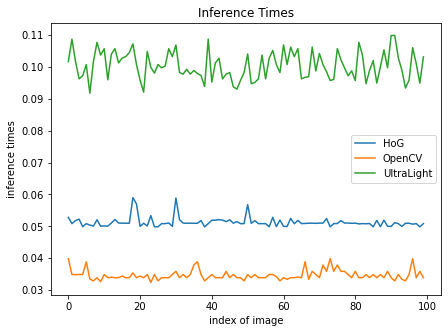

In [21]:
fig, axs = plt.subplots(sharex=True, sharey=True,figsize=(7, 5))
axs.plot(HoGDlib, label='HoG')
plt.plot(CNNOpenCV, label='OpenCV')
plt.plot(UltraLightONNX, label='ONNX')
plt.plot(UltraLightMNN, label='MNN')

plt.title('Inference Times')
plt.xlabel('index of image')
plt.ylabel('inference times')
axs.legend(loc='center right')

